In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt


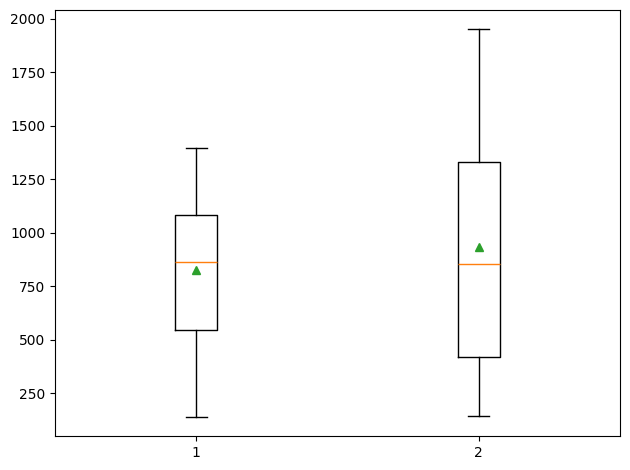

In [4]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a, showmeans=True)
axis.boxplot(c, showmeans=True, positions=[2]) # positions leidzia pastumti stulpeli
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

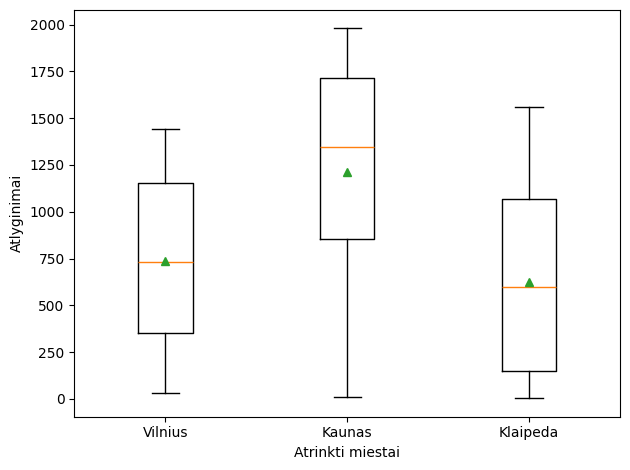

In [5]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data= [a,c,d]

fig, axis = plt.subplots()
#plotting code:
axis.boxplot(data, showmeans=True)
axis.set_ylabel('Atlyginimai')
axis.set_xlabel('Atrinkti miestai')
axis.set_xticklabels(['Vilnius','Kaunas', 'Klaipeda'])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [6]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.

In [7]:
lifeExp = pd.read_csv('NewData/life-exp.csv')
gov = pd.read_csv('NewData/gov-forms.csv')



lifeExp_gov=  pd.merge(left= lifeExp, right= gov,
                                 left_on='Entity', right_on='Name', how='inner')


lifeExp_gov[['Constitutional form', 'Life expectancy','Year']]

lifeExp_gov_gr = lifeExp_gov.query('Year == 2019').groupby(by='Constitutional form').mean(numeric_only=True).reset_index()
lifeExp_gov_gr.head()


,Constitutional form,Year,Life expectancy
0,Absolute monarchy,2019.0,72.262000
1,Constitutionalmonarchy,2019.0,77.183368
2,Provisional,2019.0,64.171333
3,Republic,2019.0,71.958209


In [8]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis

lifeExp_country = lifeExp_gov[['Name', 'Life expectancy','Year']]

lifeExp_country_q = lifeExp_country.query('Year == 2019').groupby('Name').mean(numeric_only=True).sort_values(by='Life expectancy').reset_index()

lifeExp_country_q.head(3)

,Name,Life expectancy,Year
0,Central African Republic,53.283,2019.0
1,Chad,54.239,2019.0
2,Lesotho,54.331,2019.0


In [9]:
lifeExp_country_q.tail(3)

,Name,Life expectancy,Year
179,Japan,84.629,2019.0
180,San Marino,84.972,2019.0
181,Monaco,86.751,2019.0


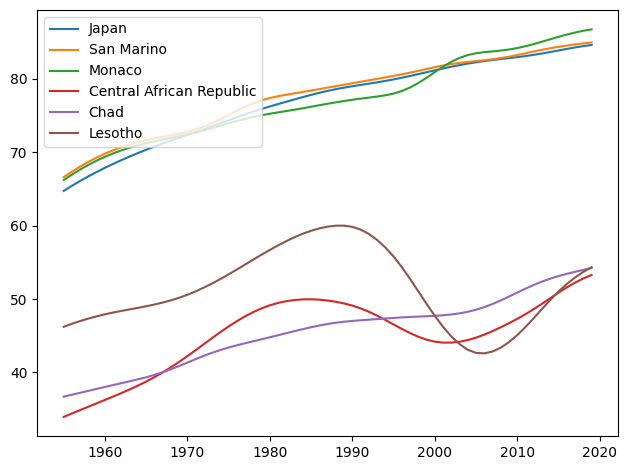

In [10]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis




# lifeExp_country_Japan = lifeExp_gov.query('Name == "Japan"')
# lifeExp_country_SanMarino= lifeExp_gov.query('Name == "San Marino"')[['Year','Life expectancy']]
# lifeExp_country_Monaco = lifeExp_gov.query('Name == "Monaco"')[['Year','Life expectancy']]


trump = lifeExp_country_q.head(3)
ilg = lifeExp_country_q.tail(3)

fig, axis = plt.subplots()

for country in ilg['Name']:
    ilg_val = lifeExp_gov.query('Name == @country')[['Year','Life expectancy']].sort_values(by=['Year'])
    axis.plot(ilg_val['Year'], ilg_val['Life expectancy'], label=country)

for country in trump['Name']:
    trump_vals = lifeExp_gov.query('Name == @country')[['Year','Life expectancy']].sort_values(by=['Year'])
    axis.plot(trump_vals['Year'], trump_vals['Life expectancy'], label=country)

axis.legend(loc='upper left')
# axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()



In [11]:
# Nuskaitykite auto.csv failą.
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.


auto= pd.read_csv('NewData/auto.csv', sep= "|")

def converter(sk):
    skaicius = float(sk[0:-1].replace(' ','').replace('k','').replace('Nenurodyt','0'))
    return skaicius

auto['Kainos'] = auto['price'].apply(converter)

autoVid = auto[['Kainos','gamintojas','pagaminimo_data']].groupby('gamintojas').mean(numeric_only=True).sort_values(by='Kainos')
autoVid.tail().reset_index()






,gamintojas,Kainos
0,Maserati,3495.000000
1,Land Rover,4092.500000
2,Tesla,4566.666667
3,Porsche,6199.900000
4,Aston Martin,12500.000000


In [12]:
autoVid.head().reset_index()

,gamintojas,Kainos
0,Isuzu,85.0
1,Lada,135.0
2,Smart,164.5
3,Suzuki,182.0
4,UAZ,185.0


In [13]:
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

def converter_data(sk):
    skaicius = float(sk[:4])
    return 2024 - skaicius 

auto['NewData'] = auto['pagaminimo_data'].apply(converter_data)

autoVid_data = auto[['NewData','gamintojas']].groupby('gamintojas').mean(numeric_only=True).sort_values(by='NewData')
autoVid_data.tail().reset_index()





,gamintojas,NewData
0,UAZ,35.00
1,Pontiac,41.50
2,Lada,42.50
3,Lincoln,55.00
4,GAZ,58.25


In [14]:
# nuskaitykite dus2014 ir dus2018 failus. /////// Reikalingas groupby
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.

dust14= pd.read_csv('NewData/DUS2014.csv')
dust18= pd.read_csv('NewData/DUS2018.csv')



dust14_small = dust14[['bdu_spalio','issilavinimas']].groupby(by='issilavinimas').mean(numeric_only=True).sort_values(by='bdu_spalio') / 3.45
dust14_small.head().reset_index()

,issilavinimas,bdu_spalio
0,G1,475.129950
1,G2,544.334001
2,G3,731.003475
3,G4,1012.786703


In [15]:
dust18_small = dust18[['bdu_spalio','issilavinimas']].groupby(by='issilavinimas').mean(numeric_only=True).sort_values(by='bdu_spalio')
dust18_small.head().reset_index()

,issilavinimas,bdu_spalio
0,G1,626.391679
1,G2,732.687157
2,G3,1094.764026
3,G4,1246.451196


In [16]:
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
sujungta=  pd.merge(left= dust14_small, right= dust18_small,
                                 left_on='issilavinimas', right_on='issilavinimas', how='inner')

sujungta.head().reset_index()


,issilavinimas,bdu_spalio_x,bdu_spalio_y
0,G1,475.129950,626.391679
1,G2,544.334001,732.687157
2,G3,731.003475,1094.764026
3,G4,1012.786703,1246.451196


In [17]:
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.

sujungta['Skirtumas'] = ((sujungta['bdu_spalio_y'] - sujungta['bdu_spalio_x']) / sujungta['bdu_spalio_x']) * 100
sujungta.head().reset_index()

,issilavinimas,bdu_spalio_x,bdu_spalio_y,Skirtumas
0,G1,475.129950,626.391679,31.835865
1,G2,544.334001,732.687157,34.602497
2,G3,731.003475,1094.764026,49.761809
3,G4,1012.786703,1246.451196,23.071442


In [18]:
# #suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais,
# atsižvelgdami į amžiaus grupes
# Hintas: pritaikyti funkcija

In [67]:
dust14= pd.read_csv('NewData/DUS2014.csv')
dust18= pd.read_csv('NewData/DUS2018.csv')

def pavConverter(AmziausGr):
    if AmziausGr == '14-19' or AmziausGr == '20-29':
        return '14-29'
    else:
        return AmziausGr
    
dust14['amzius'] = dust14['amzius'].apply(pavConverter)



In [68]:
dust14_small_amzius = dust14[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius') / 3.45
dust14_small_amzius.head(6).reset_index()




    


,amzius,bdu_spalio
0,14-29,599.852683
1,30-39,796.553943
2,40-49,701.188028
3,50-59,667.304275
4,60+,627.363506


In [69]:
dust18_small_amzius = dust18[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius')
dust18_small_amzius.head(6).reset_index()





,amzius,bdu_spalio
0,14-29,865.563301
1,30-39,1088.955721
2,40-49,980.855429
3,50-59,856.067124
4,60+,784.542386


In [70]:
# dust18_small_amzius_sujung=  pd.merge(left= dust14_small_amzius, right= dust18_small_amzius,
#                                  left_on='amzius', right_on='amzius', how='outer')

# dust18_small_amzius_sujung.head().reset_index()

dust14_small_amzius.join(dust18_small_amzius, on='amzius', how='outer', lsuffix='_14', rsuffix='_18')

,bdu_spalio_14,bdu_spalio_18
amzius,,
14-29,599.852683,865.563301
30-39,796.553943,1088.955721
40-49,701.188028,980.855429
50-59,667.304275,856.067124
60+,627.363506,784.542386


In [75]:
dust18_small_amzius_sujung=  pd.merge(left= dust14_small_amzius, right= dust18_small_amzius,
                                 left_on='amzius', right_on='amzius', how='inner')

dust18_small_amzius_sujung.head().reset_index()

dust18_small_amzius_sujung['bdu_spalio_proc'] = (dust18_small_amzius_sujung['bdu_spalio_y'] - dust18_small_amzius_sujung['bdu_spalio_x']) / dust18_small_amzius_sujung['bdu_spalio_x'] *100

dust18_small_amzius_sujung.head().reset_index()

,amzius,bdu_spalio_x,bdu_spalio_y,bdu_spalio_proc
0,14-29,599.852683,865.563301,44.295979
1,30-39,796.553943,1088.955721,36.708346
2,40-49,701.188028,980.855429,39.884794
3,50-59,667.304275,856.067124,28.287373
4,60+,627.363506,784.542386,25.053877


In [76]:
# #suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais,
# atsižvelgdami į amžiaus grupes
# Hintas: pritaikyti funkcija

dust14= pd.read_csv('NewData/DUS2014.csv')
dust18= pd.read_csv('NewData/DUS2018.csv')

def pavConverter(AmziausGr):
    if AmziausGr == '14-19' or AmziausGr == '20-29':
        return '14-29'
    else:
        return AmziausGr
    
dust14['amzius'] = dust14['amzius'].apply(pavConverter)
dust14_small_amzius = dust14[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius') / 3.45
dust14_small_amzius.head(6).reset_index()
dust18_small_amzius = dust18[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius')
dust18_small_amzius.head(6).reset_index()
dust18_small_amzius_sujung=  pd.merge(left= dust14_small_amzius, right= dust18_small_amzius,
                                 left_on='amzius', right_on='amzius', how='inner')
dust18_small_amzius_sujung.head().reset_index()

dust18_small_amzius_sujung['bdu_spalio_proc'] = (dust18_small_amzius_sujung['bdu_spalio_y'] - dust18_small_amzius_sujung['bdu_spalio_x']) / dust18_small_amzius_sujung['bdu_spalio_x'] *100

dust18_small_amzius_sujung.head().reset_index()

,amzius,bdu_spalio_x,bdu_spalio_y,bdu_spalio_proc
0,14-29,599.852683,865.563301,44.295979
1,30-39,796.553943,1088.955721,36.708346
2,40-49,701.188028,980.855429,39.884794
3,50-59,667.304275,856.067124,28.287373
4,60+,627.363506,784.542386,25.053877
